### Destek Vektör Regresyonu (SVR)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [45]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [46]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

#### Doğrusal SVR

In [4]:
from sklearn.svm import SVR

In [5]:
svr_model = SVR("linear").fit(X_train, y_train)

In [6]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [7]:
print("y = {0} + {1} * X".format(svr_model.intercept_[0],
                                svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * X


In [8]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [9]:
-48.69756097561513 + 4.969512195122093 * 91

403.5280487804953

In [10]:
y_pred = svr_model.predict(X_train)

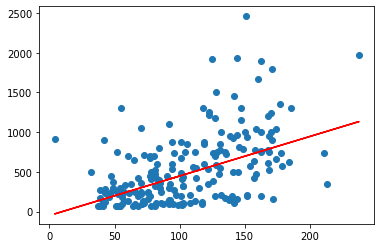

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color= "r");

In [43]:
from sklearn.linear_model import LinearRegression 

lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} * X".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 * X


In [13]:
-8.814095480334572 + 5.1724561354706875 * 91

461.879412847498

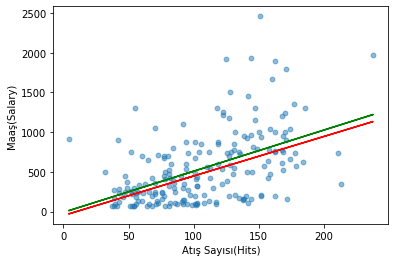

In [14]:
plt.scatter(X_train, y_train, alpha= 0.5, s=23)
plt.plot(X_train, lm_pred, "g")
plt.plot(X_train, y_pred, color= "r")

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

### TAHMİN

In [15]:
print("y = {0} + {1} * X".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * X


In [16]:
svr_model.predict([[91]])

array([403.52804878])

In [17]:
# Test Hatasını hesaplayalım sonrasında Model Tuning işlemine geçiceğiz.

In [18]:
y_pred = svr_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

### Model Tuning

In [20]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv= 10).fit(X_train, y_train)

In [22]:
svr_cv_model.best_params_

{'C': 0.1}

In [23]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [24]:
svr_tuned = SVR("linear", C= pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [25]:
# Test hatasını heseplama işlemini gerçekleştirelim.

In [26]:
y_pred = svr_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

### Doğrusal Olmayan SVR

In [29]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [30]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

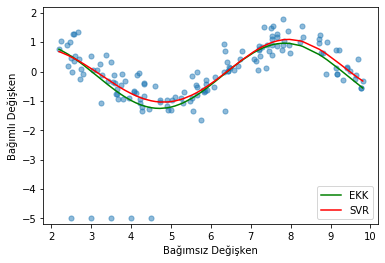

In [31]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [32]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [33]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

### TAHMİN

In [34]:
y_pred = svr_rbf.predict(X_test) 
np.sqrt(mean_squared_error(y_test, y_pred))

#ilkel test hatası hesabı

460.0032657244849

### Model Tuning 

In [35]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
svr_params = {"C": np.arange(0,1000,1)}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv= 10).fit(X_train, y_train)
svr_cv_model

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
D:\anaconda3\lib\sit

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42...
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 99

In [51]:
pd.Series(svr_cv_model.best_params_)[0]

81

In [52]:
svr_tuned = SVR("rbf", C= pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [53]:
y_pred = svr_tuned.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, y_pred))

435.3844429267587